# Classifications

1) Load data

2) Train models, test and evaluate

3) Save models

Classification methods: 
- random forest
- decision tree
- xgboost

Extension:
- neural net
- svm
- ada boost
- bayes
- logistic regression

Ressources:

https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195
https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from evaluation import evaluation_classification

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn

from joblib import dump

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

In [2]:
# read all prepared data

# shuffled vs not shuffled data (one additional randomization before splitting)

name_array = ["X_train_sub", "y_train_sub", "X_exp_train_sub", "y_exp_train_sub", \
              "X_train", "y_train", "X_test", "y_test", \
              "X_exp_train", "y_exp_train", "X_exp_test", "y_exp_test", \
              "X_test_urban", "y_test_urban", "X_test_rural", "y_test_rural"]
name_data = []

for i in range(len(name_array)):
    # name_data.append(np.load("mobility_data/network_new_split_shuffled/" + name_array[i] + ".npy", allow_pickle=True))
    name_data.append(np.load("data/network_new_split_shuffled/" + name_array[i] + ".npy", allow_pickle=True))

X_train_sub, y_train_sub, X_exp_train_sub, y_exp_train_sub, \
X_train, y_train, X_test, y_test, \
X_exp_train, y_exp_train, X_exp_test, y_exp_test, \
X_test_urban, y_test_urban, X_test_rural, y_test_rural = \
name_data[0], name_data[1], name_data[2], name_data[3], \
name_data[4], name_data[5], name_data[6], name_data[7], \
name_data[8], name_data[9], name_data[10], name_data[11], \
name_data[12], name_data[13], name_data[14], name_data[15]

In [3]:
# train models

rf = RandomForestClassifier(random_state = 0, n_estimators=100)
dt = DecisionTreeClassifier(random_state = 0)
xgb = XGBClassifier(random_state = 0)

rf.fit(X_train_sub, y_train_sub)
dt.fit(X_train_sub, y_train_sub)
xgb.fit(X_train_sub, y_train_sub)

# add other than tree models

# neural net
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_sub, y_train_sub)

# SVM
clf = SVC(random_state=0)
clf.fit(X_train_sub, y_train_sub)

# ada boost
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train_sub, y_train_sub)

# naive bayes
bayes = GaussianNB()
bayes.fit(X_train_sub, y_train_sub)

# logistic regression
log = LogisticRegression(random_state=0)
log.fit(X_train_sub, y_train_sub)

/home/laura/miniconda3/envs/late/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/laura/miniconda3/envs/late/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/laura/miniconda3/envs/late/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [4]:
print(np.shape(X_test), np.shape(X_test_urban), np.shape(X_test_rural))

(477, 18) (185, 18) (292, 18)


In [5]:
# full test data set
print(dt.score(X_test, y_test))
print(rf.score(X_test, y_test))
print(xgb.score(X_test, y_test))

# add other than tree models

print("new models")

print(log.score(X_test, y_test))

print(ada.score(X_test, y_test))
print(clf.score(X_test, y_test))

print(mlp.score(X_test, y_test))
print(bayes.score(X_test, y_test))


0.4276729559748428
0.5157232704402516
0.49056603773584906
new models
0.46331236897274636
0.1949685534591195
0.46540880503144655
0.4549266247379455
0.29350104821802936


In [6]:
# urban regions
print(dt.score(X_test_urban, y_test_urban))
print(rf.score(X_test_urban, y_test_urban))
print(xgb.score(X_test_urban, y_test_urban))

# add other than tree models

print("new models")

print(log.score(X_test_urban, y_test_urban))

print(ada.score(X_test_urban, y_test_urban))
print(clf.score(X_test_urban, y_test_urban))

print(mlp.score(X_test_urban, y_test_urban))
print(bayes.score(X_test_urban, y_test_urban))

0.7135135135135136
0.8540540540540541
0.7891891891891892
new models
0.7783783783783784
0.11891891891891893
0.7837837837837838
0.7405405405405405
0.3837837837837838


In [7]:
# rural regions
print(dt.score(X_test_rural, y_test_rural))
print(rf.score(X_test_rural, y_test_rural))
print(xgb.score(X_test_rural, y_test_rural))

# add other than tree models

print("new models")

print(log.score(X_test_rural, y_test_rural))

print(ada.score(X_test_rural, y_test_rural))
print(clf.score(X_test_rural, y_test_rural))

print(mlp.score(X_test_rural, y_test_rural))
print(bayes.score(X_test_rural, y_test_rural))

0.2465753424657534
0.3013698630136986
0.3013698630136986
new models
0.2636986301369863
0.24315068493150685
0.2636986301369863
0.273972602739726
0.2363013698630137


## Extended Evaluation

total number of mismatches 273
accuracy 0.428


class zero
204
positive diff
1 58
2 32
3 17
4 8
5 9
6 1
7 0
8 0
9 0
negative diff
1 68
2 31
3 22
4 9
5 7
6 5
7 1
8 5
9 0
abs diff
1 126
2 63
3 39
4 17
5 16
6 6
7 1
8 5
9 0


total absolute difference / number of misclassified elements
0.21978021978021978


total absolute difference / number of total test elements (MAE)
0.12578616352201258
MAE imbalanced
1.2578616352201257


()

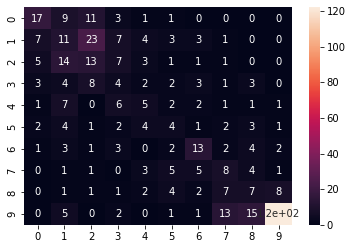

In [8]:
# decision tree
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, dt)

total number of mismatches 231
accuracy 0.516


class zero
246
positive diff
1 42
2 30
3 15
4 2
5 0
6 0
7 0
8 0
9 0
negative diff
1 56
2 42
3 21
4 15
5 5
6 1
7 1
8 1
9 0
abs diff
1 98
2 72
3 36
4 17
5 5
6 1
7 1
8 1
9 0


total absolute difference / number of misclassified elements
0.2008658008658009


total absolute difference / number of total test elements (MAE)
0.09727463312368974
MAE imbalanced
0.9727463312368972


()

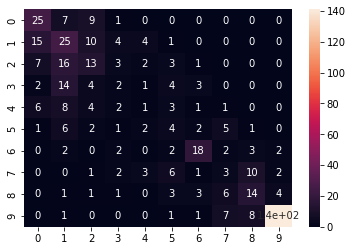

In [9]:
# random forest
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, rf)

total number of mismatches 243
accuracy 0.491


class zero
234
positive diff
1 35
2 34
3 14
4 4
5 2
6 1
7 0
8 0
9 0
negative diff
1 65
2 46
3 23
4 11
5 6
6 1
7 1
8 0
9 0
abs diff
1 100
2 80
3 37
4 15
5 8
6 2
7 1
8 0
9 0


total absolute difference / number of misclassified elements
0.20164609053497942


total absolute difference / number of total test elements (MAE)
0.10272536687631027
MAE imbalanced
1.0272536687631026


()

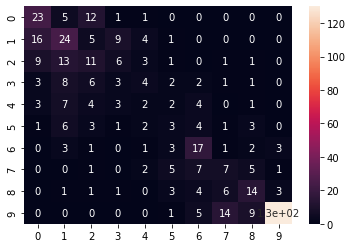

In [10]:
# xgboost
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, xgb)

total number of mismatches 256
accuracy 0.463


class zero
221
positive diff
1 57
2 28
3 22
4 10
5 7
6 7
7 2
8 4
9 0
negative diff
1 44
2 31
3 19
4 13
5 4
6 2
7 2
8 4
9 0
abs diff
1 101
2 59
3 41
4 23
5 11
6 9
7 4
8 8
9 0


total absolute difference / number of misclassified elements
0.248046875


total absolute difference / number of total test elements (MAE)
0.1331236897274633
MAE imbalanced
1.3312368972746331


()

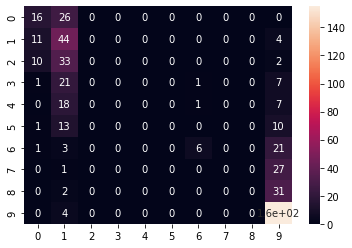

In [11]:
# log regression
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, log)

total number of mismatches 384
accuracy 0.195


class zero
93
positive diff
1 31
2 26
3 6
4 13
5 2
6 2
7 0
8 0
9 0
negative diff
1 174
2 79
3 29
4 12
5 6
6 3
7 0
8 1
9 0
abs diff
1 205
2 105
3 35
4 25
5 8
6 5
7 0
8 1
9 0


total absolute difference / number of misclassified elements
0.18177083333333335


total absolute difference / number of total test elements (MAE)
0.14633123689727465
MAE imbalanced
1.4633123689727463


()

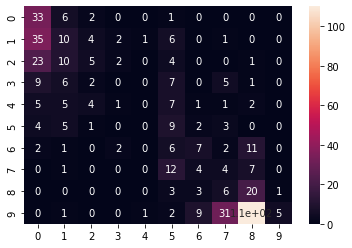

In [12]:
# ada boost
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, ada)

total number of mismatches 255
accuracy 0.465


class zero
222
positive diff
1 60
2 29
3 20
4 10
5 7
6 6
7 3
8 2
9 0
negative diff
1 45
2 28
3 19
4 14
5 4
6 2
7 2
8 4
9 0
abs diff
1 105
2 57
3 39
4 24
5 11
6 8
7 5
8 6
9 0


total absolute difference / number of misclassified elements
0.24235294117647058


total absolute difference / number of total test elements (MAE)
0.12955974842767295
MAE imbalanced
1.2955974842767295


()

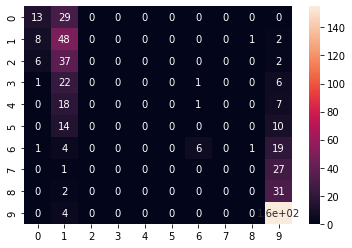

In [13]:
# svm
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, clf)

total number of mismatches 260
accuracy 0.455


class zero
217
positive diff
1 57
2 16
3 16
4 9
5 5
6 2
7 2
8 0
9 0
negative diff
1 75
2 32
3 24
4 13
5 4
6 1
7 2
8 2
9 0
abs diff
1 132
2 48
3 40
4 22
5 9
6 3
7 4
8 2
9 0


total absolute difference / number of misclassified elements
0.20884615384615385


total absolute difference / number of total test elements (MAE)
0.11383647798742137
MAE imbalanced
1.1383647798742138


()

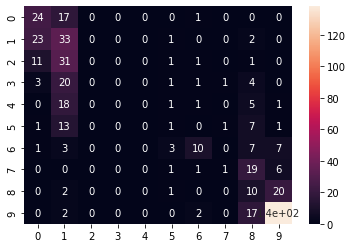

In [14]:
# mlp (neural net)
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, mlp)

total number of mismatches 337
accuracy 0.294


class zero
140
positive diff
1 28
2 23
3 18
4 4
5 2
6 0
7 0
8 0
9 0
negative diff
1 82
2 96
3 33
4 30
5 15
6 2
7 2
8 1
9 1
abs diff
1 110
2 119
3 51
4 34
5 17
6 2
7 2
8 1
9 1


total absolute difference / number of misclassified elements
0.22700296735905046


total absolute difference / number of total test elements (MAE)
0.16037735849056603
MAE imbalanced
1.6037735849056605


()

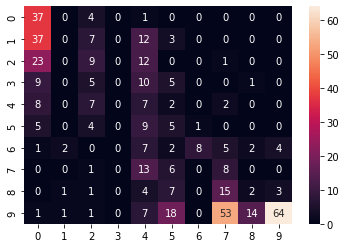

In [15]:
# naive bayes
evaluation_classification([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], X_test, y_test, bayes)

In [ ]:
# save models

#path = "models/"
path = "models_shuffled/"

#dump(dt, path + "decision_tree.joblib")
#dump(rf, path + "random_forest.joblib")
#dump(xgb, path + "xgboost.joblib")